In [1]:
#-*- coding: euc-kr -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
path = 'challenge_data/'

data = pd.read_csv(path + 'Data_set.csv', encoding = 'euc-kr')
test = pd.read_csv(path + 'Test_set.csv', encoding = 'euc-kr')

In [3]:
data.describe()

CUST_ID        TARGET   BNK_LNIF_CNT   CPT_LNIF_CNT  \
count  100233.000000  100233.00000  100233.000000  100233.000000   
mean    51124.199445       0.04277       0.840192       0.500873   
std     29522.979407       0.20234       0.734242       0.838422   
min         1.000000       0.00000       0.000000       0.000000   
25%     25557.000000       0.00000       0.000000       0.000000   
50%     51119.000000       0.00000       1.000000       0.000000   
75%     76691.000000       0.00000       1.000000       1.000000   
max    102252.000000       1.00000       5.000000       5.000000   

       SPART_LNIF_CNT   ECT_LNIF_CNT   TOT_LNIF_AMT   TOT_CLIF_AMT  \
count   100233.000000  100233.000000  100233.000000  100233.000000   
mean         0.953029       0.477986   84042.832530   33202.187703   
std          1.138649       0.707598  127511.859603   83070.276370   
min          0.000000       0.000000       1.000000       0.000000   
25%          0.000000       0.000000   12001.000000       0.000000   
50%          1.000000       0.000000   39001.000000    9001.000000   
75%          1.000000       1.000000  105001.000000   30001.000000   
max          7.000000       6.000000  994001.000000  994001.000000   

        BNK_LNIF_AMT   CPT_LNIF_AMT  CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  \
count  100233.000000  100233.000000   100233.000000    100233.000000   
mean    51648.838237    4185.885108       18.080203        13.991669   
std     95759.025724   13035.386223       29.095001        28.687146   
min         0.000000       0.000000        0.000000         0.000000   
25%         0.000000       0.000000        0.000000         0.000000   
50%      9001.000000       0.000000        1.000000         0.000000   
75%     63001.000000    3001.000000       25.000000        13.000000   
max    944001.000000  301001.000000      121.000000       121.000000   

       CRDT_CARD_CNT  CTCD_OCCR_MDIF    CB_GUIF_CNT    CB_GUIF_AMT  \
count  100233.000000   100233.000000  100233.000000  100233.000000   
mean        3.092285       91.004200       0.096256    9183.099508   
std         1.829295       41.957547       0.523791   78569.076446   
min         0.000000        0.000000       0.000000       0.000000   
25%         2.000000       61.000000       0.000000       0.000000   
50%         3.000000      121.000000       0.000000       0.000000   
75%         4.000000      121.000000       0.000000       0.000000   
max        11.000000      121.000000      10.000000  980001.000000   

       CUST_JOB_INCM  HSHD_INFR_INCM  ACTL_FMLY_NUM  CUST_FMLY_NUM  \
count  100233.000000   100233.000000  100233.000000  100233.000000   
mean     2788.233416     6922.486606       2.757794       1.392565   
std      2472.287102     2996.156129       1.316862       0.618116   
min         0.000000        0.000000       1.000000       1.000000   
25%         0.000000     4800.000000       2.000000       1.000000   
50%      3600.000000     6600.000000       3.000000       1.000000   
75%      4700.000000     9200.000000       4.000000       2.000000   
max     10000.000000    20000.000000       8.000000       5.000000   

       LAST_CHLD_AGE  MATE_JOB_INCM  CRDT_LOAN_CNT  MIN_CNTT_DATE  \
count   99206.000000  100233.000000  100233.000000  100233.000000   
mean       12.233958    1719.524508       0.162232   19743.957130   
std        13.964236    2460.475232       0.612144   59751.358139   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%        24.000000    4400.000000       0.000000       0.000000   
max        60.000000   10000.000000      11.000000  201604.000000   

       TOT_CRLN_AMT  TOT_REPY_AMT  CRLN_OVDU_RATE  CRLN_30OVDU_RATE  \
count  1.002330e+05  1.002330e+05   100233.000000     100233.000000   
mean   1.182315e+06  8.709208e+05        2.522213          0.225295   
std    5.318477e+06  4.

In [3]:
col_o = data.iloc[:, 16:52].columns

In [8]:
col_o

Index(['OCCP_NAME_G', 'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM',
       'CUST_FMLY_NUM', 'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM',
       'CRDT_LOAN_CNT', 'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT',
       'CRLN_OVDU_RATE', 'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE',
       'STRT_CRDT_GRAD', 'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE',
       'AVG_STLN_RATE', 'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE',
       'GDINS_MON_PREM', 'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM',
       'FMLY_SVINS_MNPREM', 'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM',
       'CNTT_LAMT_CNT', 'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT',
       'FMLY_CLAM_CNT', 'FMLY_PLPY_CNT'],
      dtype='object')

In [23]:
for c in col:
    print(c)
    print(data[c].value_counts())
    print('-' * 50)

CUST_ID
2047      1
60104     1
80562     1
78515     1
68276     1
66229     1
72374     1
70327     1
92856     1
90809     1
96954     1
94907     1
84668     1
82621     1
88766     1
86719     1
43712     1
41665     1
47810     1
45763     1
35524     1
33477     1
39622     1
74417     1
76464     1
98981     1
661       1
51852     1
49805     1
55950     1
53903     1
10896     1
8849      1
14994     1
12947     1
2708      1
6806      1
101028    1
4759      1
27288     1
25241     1
31386     1
29339     1
19100     1
17053     1
23198     1
21151     1
37575     1
58057     1
64138     1
64202     1
74481     1
80626     1
78579     1
68340     1
66293     1
72438     1
70391     1
92920     1
90873     1
97018     1
94971     1
84732     1
82685     1
88830     1
86783     1
43776     1
41729     1
47874     1
45827     1
35588     1
33541     1
76528     1
99045     1
101092    1
2772      1
62155     1
51916     1
49869     1
56014     1
53967     1
10960     1
8913    

--------------------------------------------------
AGE
45    19052
50    17734
55    15321
40    14807
35    12003
60     9190
30     5268
65     3584
25     2201
*       430
70      403
20      240
Name: AGE, dtype: int64
--------------------------------------------------
SEX
2    54490
1    45313
*      430
Name: SEX, dtype: int64
--------------------------------------------------
AVG_CALL_TIME
0        10466
1          334
86         301
74         293
90         293
89         292
82         288
119        288
100        286
88         286
95         286
87         285
105        282
98         281
78         280
96         279
77         277
104        277
70         277
92         276
101        276
91         275
113        274
81         272
135        271
102        270
111        268
118        267
63         266
58         266
116        266
84         266
62         265
68         265
117        265
134        264
97         263
127        263
125        263
64         262


In [4]:
data.loc[(data.SEX == '*')&(data.TARGET == 1)]

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
3430      3499       1             2             1               1   
17145    17485       1             1             0               1   
22154    22599       1             0             2               2   
25128    25631       1             1             0               1   
26088    26610       1             0             3               3   
31824    32469       1             1             0               0   
50449    51461       1             0             1               2   
50840    51859       1             1             0               0   
60559    61758       1             0             1               2   
61748    62973       1             0             1               2   
71857    73308       1             1             3               4   
71913    73366       1             1             0               0   
74654    76164       1             0             1               3   
94006    95916       1             0             1               2   

       ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
3430              0         45001         45001         45001             1   
17145             1         12001         12001             1             0   
22154             0         12001          3001             0         12001   
25128             1         12001         12001          9001             0   
26088             0         18001             0             0         18001   
31824             0          9001             0          9001             0   
50449             1          9001          3001             0          6001   
50840             0             1             1             1             0   
60559             1         12001          9001             0          3001   
61748             1         12001         12001             0          9001   
71857             1         69001         54001         36001         24001   
71913             0             1             1             1             0   
74654             2          6001          6001             0             1   
94006             1         15001         15001             0         15001   

       CRDT_OCCR_MDIF  SPTCT_OCCR_MDIF  CRDT_CARD_CNT  CTCD_OCCR_MDIF  \
3430               13               13              0               0   
17145               1                1              4               1   
22154               1                1              4              13   
25128              49              121              0               0   
26088               0                0              2             121   
31824               0                0              5              13   
50449              13               13              3              25   
50840               1                0              0               0   
60559              49               49              1              73   
61748              13               61              2              85   
71857               0                1              6              85   
71913              37                0              0               0   
74654              13               25              0               0   
94006               1               13              2              13   

       CB_GUIF_CNT  CB_GUIF_AMT OCCP_NAME_G  CUST_JOB_INCM  HSHD_INFR_INCM  \
3430             0            0           *              0           10100   
17145            0            0           *           2500            5500   
22154            0            0           *              0            3000   
25128            2       980001           *           3500           10200   
26088            1       108001           *           4800           12900   
31824            0            0           *              0            3100   
50449            0            0           *           3100            5600   
50840            0            0           *       

In [45]:
data.loc[(data.OCCP_NAME_G == 'missing')].index

Int64Index([    22,     23,    103,    114,    165,    276,    288,    326,
               385,    498,
            ...
             99118,  99155,  99234,  99542,  99568,  99647,  99839,  99864,
             99911, 100226],
           dtype='int64', length=1189)

In [39]:
data.head(100)

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  ECT_LNIF_CNT  \
0         1       0             1             0               0             0   
1         2       0             1             0               0             0   
2         3       0             0             1               3             2   
3         4       1             0             2               4             2   
4         5       0             4             0               0             0   
5         6       0             1             0               1             1   
6         7       0             0             1               2             1   
7         8       0             1             0               0             0   
8         9       0             2             0               0             0   
9        10       0             0             1               1             0   
10       11       1             0             3               5             2   
11       12       0             0             1               2             1   
12       13       0             1             0               0             0   
13       14       0             2             0               0             0   
14       15       0             3             1               1             0   
15       16       0             1             0               1             1   
16       17       0             1             0               3             3   
17       18       0             1             0               0             0   
18       19       0             1             0               0             0   
19       20       0             2             0               1             1   
20       21       0             0             0               1             1   
21       22       0             0             0               1             1   
22       23       0             0             0               1             1   
23       24       0             0             1               2             1   
24       25       0             1             0               0             0   
25       26       0             1             0               0             0   
26       27       0             0             0               1             1   
27       28       0             1             0               0             0   
28       29       0             3             0               0             0   
29       30       0             0             0               1             1   
30       31       0             1             0               0             0   
31       32       0             4             0               2             3   
32       33       0             0             0               1             1   
33       34       0             0             0               1             1   
34       35       0             1             0               0             0   
35       36       0             1             0               0             0   
36       37       1             0             1               2             1   
37       38       0             2             0               0             0   
38       39       0             0             1               2             1   
39       40       0             1             1               1             0   
40       41       0             0             0               1             1   
41       42       0             0             2               2             0   
42       43       0             0             1               2             1   
43       44       0             1             0               0             0   
44       45       0             1             1               3             2   
45       46       0             0             1               1             0   
46       47       1             0             1               2             1   
47       48       0             1             4               4             0   
48       49       0             0  

In [7]:
data['OCCP_NAME_G'] = data['OCCP_NAME_G'].replace('*', 'missing') 

In [ ]:
data['OCCP_NAME_G'].

In [8]:
data['OCCP_NAME_G'].replace(' ', '', regex=True, inplace=True)

In [23]:
tmp = pd.DataFrame()
tmp['count'] = data.groupby('OCCP_NAME_G')['OCCP_NAME_G'].count()

In [24]:
tmp

count
OCCP_NAME_G       
missing       1189
고소득전문직        1223
공무원           5091
기업_단체임원       1041
기타            1672
단순노무직          821
단순사무직         4107
사무직          16581
산업종사자1차       1178
산업종사자2차       9601
산업종사자3차       8275
예체능계종사자        936
운전직           2126
자영업           9485
전문직           5043
주부           27565
학생            3835

In [36]:
tmp2 = pd.DataFrame()
tmp2['count'] = data.groupby('CUST_JOB_INCM')['CUST_JOB_INCM'].count()
tmp2

count
CUST_JOB_INCM       
0              40338
2400              99
2500             116
2600             196
2700             280
2800             390
2900             502
3000             801
3100             970
3200            1229
3300            1371
3400            1551
3500            1671
3600            1928
3700            2042
3800            2170
3900            2166
4000            2249
4100            2340
4200            2220
4300            2190
4400            2170
4500            2184
4600            2068
4700            2148
4800            2051
4900            2026
5000            1896
5100            1875
5200            1780
5300            1750
5400            1631
5500            1423
5600            1269
5700            1055
5800             958
5900             807
6000             749
6100             574
6200             541
6300             419
6400             402
6500             294
6600             267
6800             465
7000             371
7200             312
7500             354
7900             332
8400             284
8900             218
9900             335
10000            406

In [37]:
tmp3 = pd.DataFrame()
tmp3['count'] = data.groupby('HSHD_INFR_INCM')['HSHD_INFR_INCM'].count()
tmp3

count
HSHD_INFR_INCM       
0                3633
1600               60
2400              528
2500              131
2600              185
2700              279
2800              281
2900              279
3000              464
3100              523
3200              550
3300              693
3400              777
3500              874
3600             1002
3700             1010
3800             1156
3900             1232
4000             1234
4100             1375
4200             1239
4300             1300
4400             1382
4500             1494
4600             1535
4700             1621
4800             1582
4900             1520
5000             1444
5100             1517
5200             1540
5300             1438
5400             1403
5500             1497
5600             1447
5700             1341
5800             1362
5900             1258
6000             1226
6100             1249
6200             1116
6300             1072
6400             1117
6500             1171
6600             1061
6700             1085
6800             1099
6900             1026
7000             1033
7100              965
7200              956
7300              997
7400              872
7500              855
7600              923
7700              887
7800              936
7900              939
8000              951
8100              969
8200              927
8300             1010
8400              927
8500              976
8600              988
8700              949
8800             1065
8900              950
9000              967
9100              925
9200              915
9300              855
9400              890
9500              850
9600              797
9700              775
9800             1239
9900             1677
10000            1574
10100            1475
10200            1314
10300            1210
10400            1110
10500             972
10600             892
10700             869
10800             683
10900             674
11000             638
11100             503
11200             476
11300             441
11500             751
11700             631
11900             516
12100             425
12400             480
12900             608
13900             691
14900             391
16900             339
19900             156
20000              41

In [38]:
tmp4 = pd.DataFrame()
tmp4['count'] = data.groupby('ACTL_FMLY_NUM')['ACTL_FMLY_NUM'].count()
tmp4

count
ACTL_FMLY_NUM       
1              21953
2              22910
3              23444
4              23542
5               6490
6               1599
7                255
8                 40

In [22]:
data['OCCP_NAME_G'] = data['OCCP_NAME_G'].replace('/', '_', regex=True)

In [18]:
data['OCCP_NAME_G'] = data['OCCP_NAME_G'].replace('1차산업종사자', '산업종사자1차')
data['OCCP_NAME_G'] = data['OCCP_NAME_G'].replace('2차산업종사자', '산업종사자2차')
data['OCCP_NAME_G'] = data['OCCP_NAME_G'].replace('3차산업종사자', '산업종사자3차')

In [35]:
print(data.OCCP_NAME_G.isnull().sum())
print(data.CUST_JOB_INCM.isnull().sum())
print(data.HSHD_INFR_INCM.isnull().sum())
print(data.ACTL_FMLY_NUM.isnull().sum())

0
0
0
0


In [26]:
data['OCCP_NAME_G'].fillna('missing', inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
occp_en = LabelEncoder()

# nan값 있을 떄 발생 (TypeError: '>' not supported between instances of 'str' and 'float')
occp_en.fit(data['OCCP_NAME_G'])

In [31]:
data['OCCP_NAME_G_le'] = occp_en.fit_transform(data['OCCP_NAME_G'])

In [40]:
col_name = data.iloc[:, 17:52].columns

In [ ]:
# pairplot 질적 변수 제거, dropna

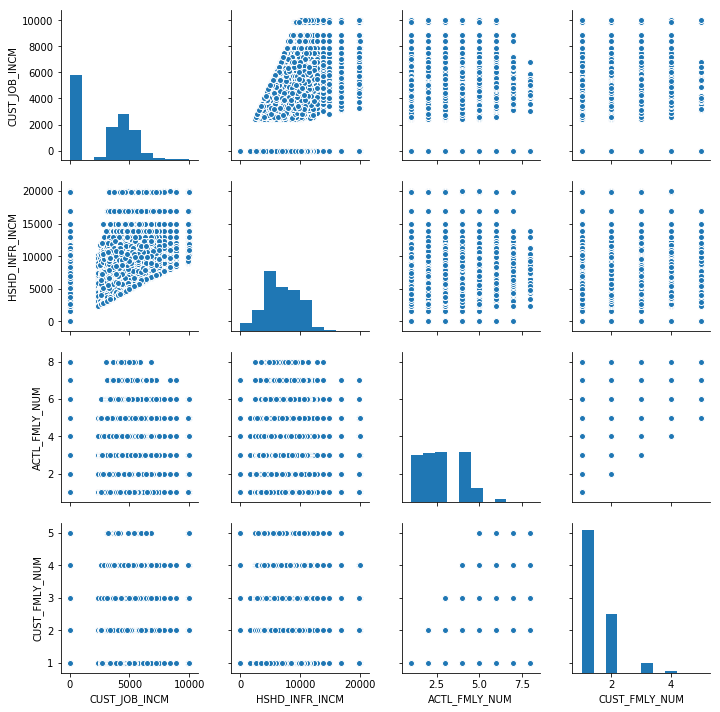

In [49]:
sns.pairplot(data=data[['CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM']], dropna=True)

# sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[4:8]]], axis=1))

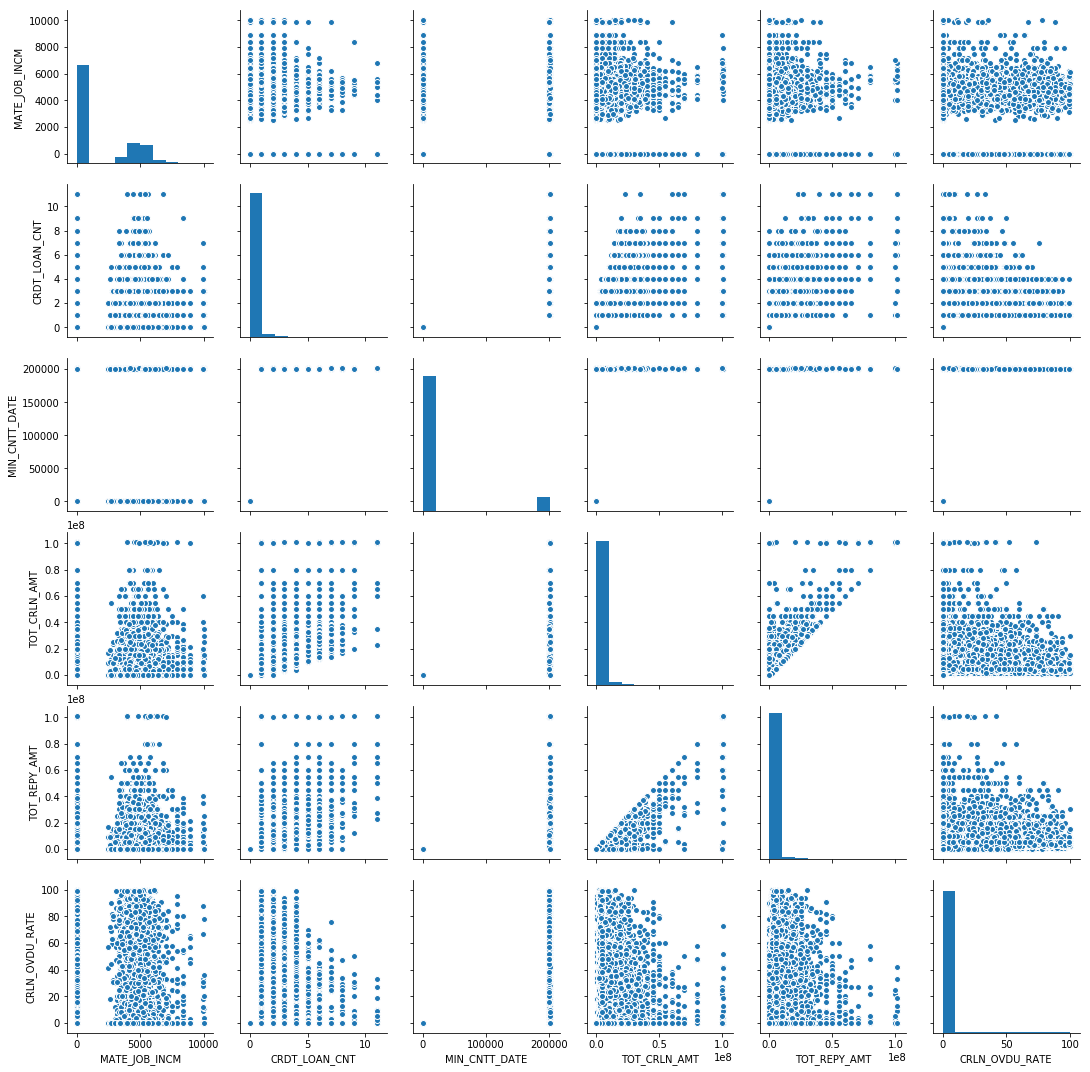

In [51]:
sns.pairplot(data=data[[ 'MATE_JOB_INCM', 'CRDT_LOAN_CNT', 'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE']], dropna=True)

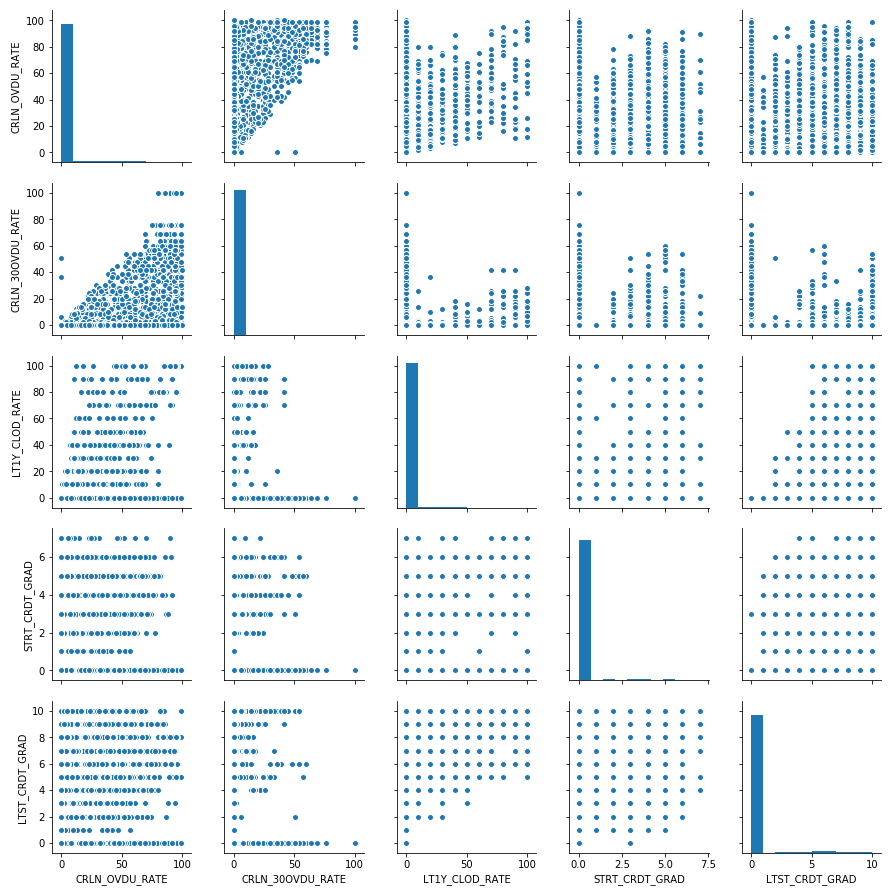

In [52]:
sns.pairplot(data=data[['CRLN_OVDU_RATE','CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD','LTST_CRDT_GRAD']], dropna=True)

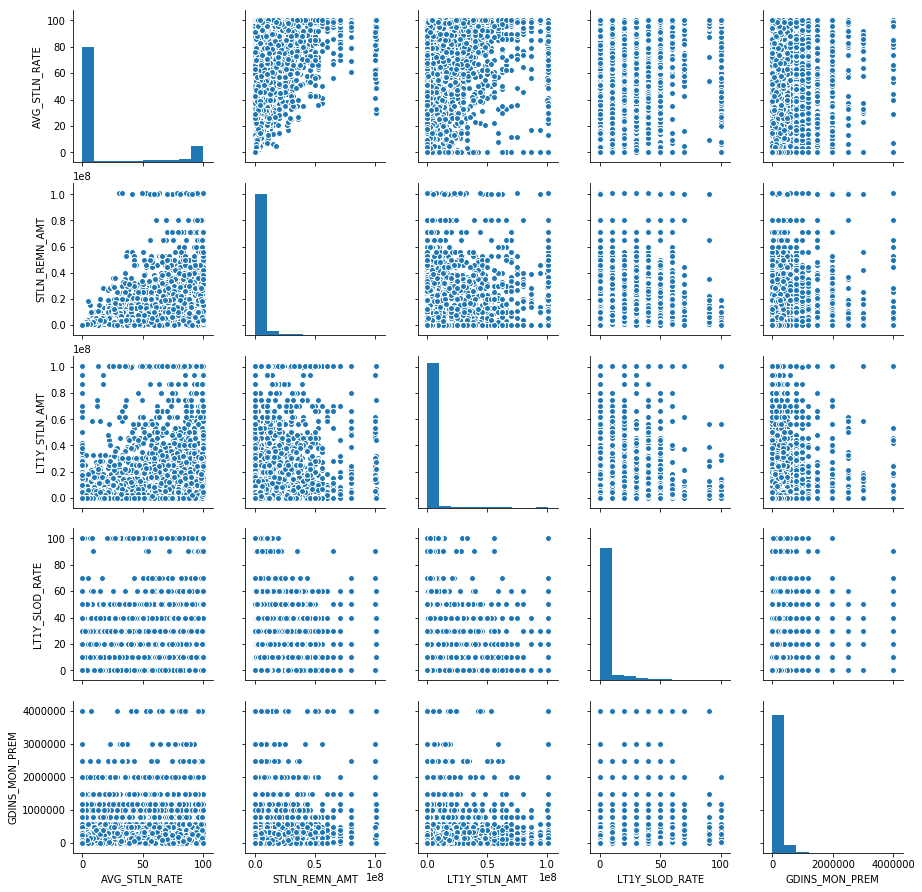

In [53]:
sns.pairplot(data=data[['AVG_STLN_RATE','STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM']], dropna=True)

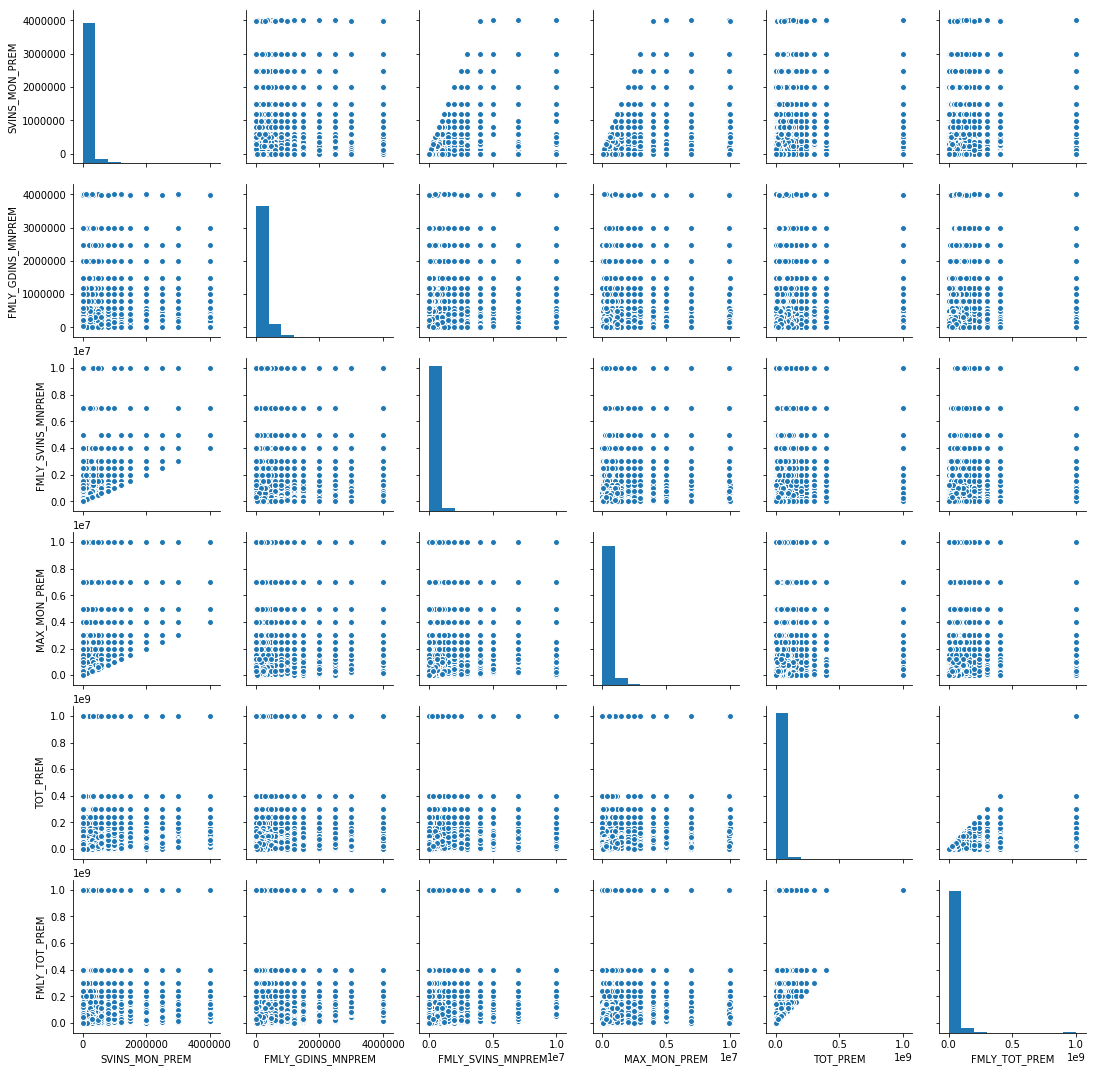

In [55]:
sns.pairplot(data=data[['SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM', 'MAX_MON_PREM', 'TOT_PREM','FMLY_TOT_PREM']], dropna=True)

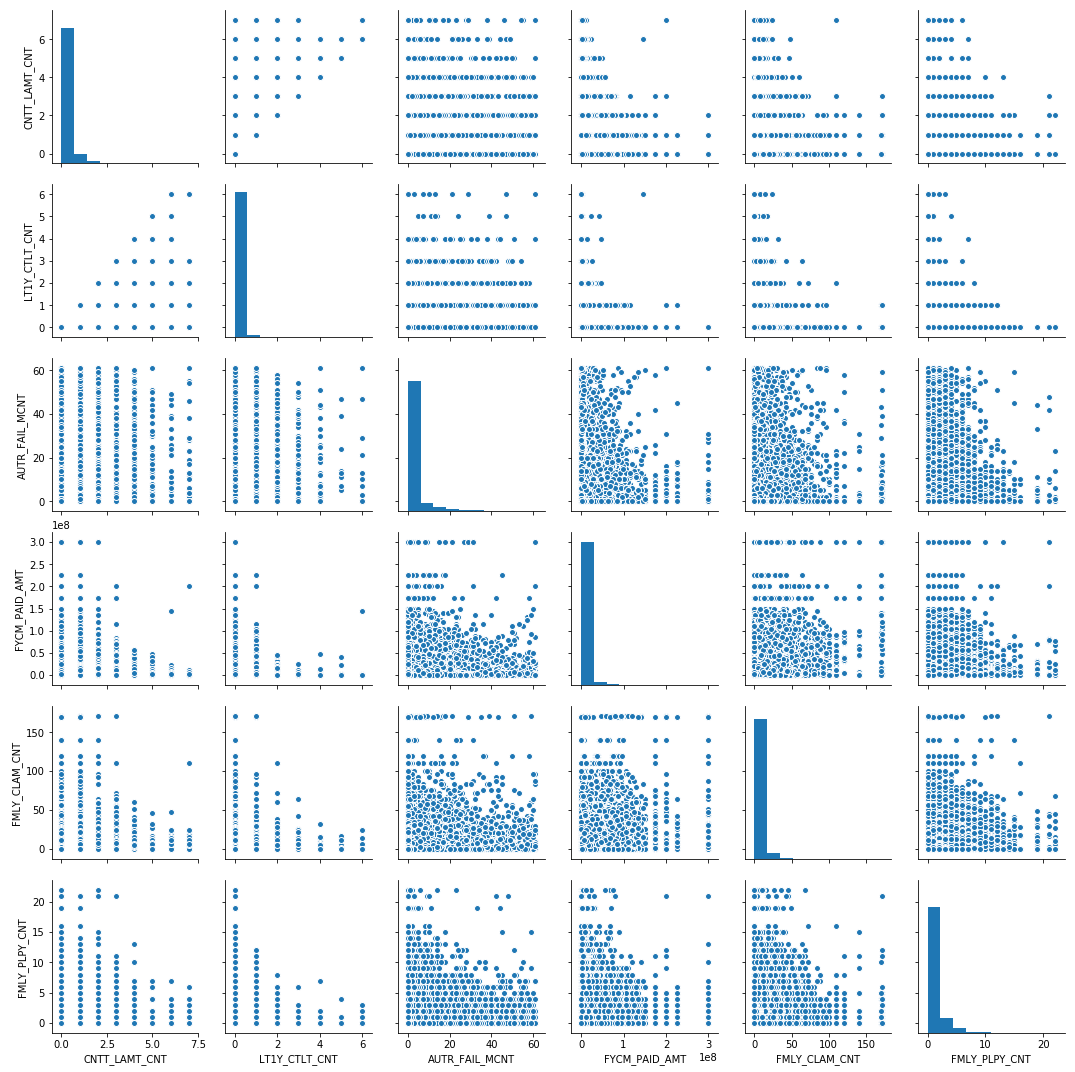

In [56]:
sns.pairplot(data=data[['CNTT_LAMT_CNT', 'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT', 'FMLY_PLPY_CNT']], dropna=True)